In [1]:
#setup 2D or 3D box
%run -i program/billiard_defs.py
%run -i program/analysis.py

dim = 3
pw_collision_law = 'no_slip'
# pw_collision_law = 'specular'
sl = 10

# Create orthonormal basis (onb) for each of the 6 faces, basis vectors down columns, normal rightmost
# Dynamics depend only on the normal, but visualization needs the full onb
names = ['x_min','x_max','y_min','y_max']
if dim == 3:
    names.extend(['z_min', 'z_max'])

onbs = []
v = np.zeros(dim)
v[0] = 1
for d in range(dim):
    for s in [1,-1]:
        onb = np.array([np.roll(v,i+d+1) for i in range(dim)]).T
        onb[:,-1] *= s
        onbs.append(onb)

# Create the wall objects
wall = []
for (name, onb) in zip(names, onbs):
    wall.append(FlatWall(pos=-sl*onb[:,-1], basis=onb, name=name, collision_law=pw_collision_law, half_length=sl))

bounding_box = np.array([[-sl,sl] for d in range(dim)])
lab_frame = np.eye(dim)  #desired frame for lab



# Used for visualization later
surface_data_dict = []
for w in wall:
    w.parametrize()
    data_dict = {
        'name': w.name,
        'x': w.param[0],
        'y': w.param[1],
    }
    if dim == 2:
        data_dict['type'] = 'scatter'
        data_dict['mode'] = 'lines'
        data_dict['line'] = dict(
            #color = ('rgb(205, 12, 24)'),
            color = 'black',
            width = 5)
    elif dim == 3:
        data_dict['type'] = 'surface'
        data_dict['opacity'] = 0.4
        data_dict['colorscale'] = [[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']]
        data_dict['showscale'] = False
        data_dict['z'] = w.param[2]
    surface_data_dict.append(data_dict)

In [2]:
# Setup particles

num_part = 7
mass = 7
gamma = 'uniform'  #parameter btw 0 mass at center) and sqrt(2/dim) (mass on outside shell)
radius = 1
temp = 10
pp_collision_law = 'no_slip'
# pp_collision_law = 'specular'

In [4]:
%run -i program/billiard_defs.py
%run -i program/analysis.py

max_steps = 8
max_distort = 50  # Used after experiment to determine whether to interpolate between collisions
# If so, how much distortion to allow.  Must be 0-100, smaller <-> more frames and smoother, but longer 
# processing and larger files.  Anything other than 0-100 will turn off smoothing

part = Particles(wall, num=num_part, mass=mass, gamma=gamma
                 ,radius=radius, temp=temp, collision_law=pp_collision_law
                 #,pos=init_pos  # comment this line out for random init pos
                 #, vel=init_vel  # comment this line out for random init vel
                )
init(wall, part)

for step in range(max_steps):
    do_the_evolution()

re_t, re_pos, re_vel, re_orient, re_spin = smoother(max_distort)
S, P, D, M = re_pos.shape

print("Finished it all.  There are {} frames in this animation of {} particles.".format(S, P))

Finished it all.  There are 32 frames in this animation of 7 particles.


In [5]:
%run -i program/analysis.py
fig = interactive_plotly()

using newer


<IPython.core.display.Javascript object>


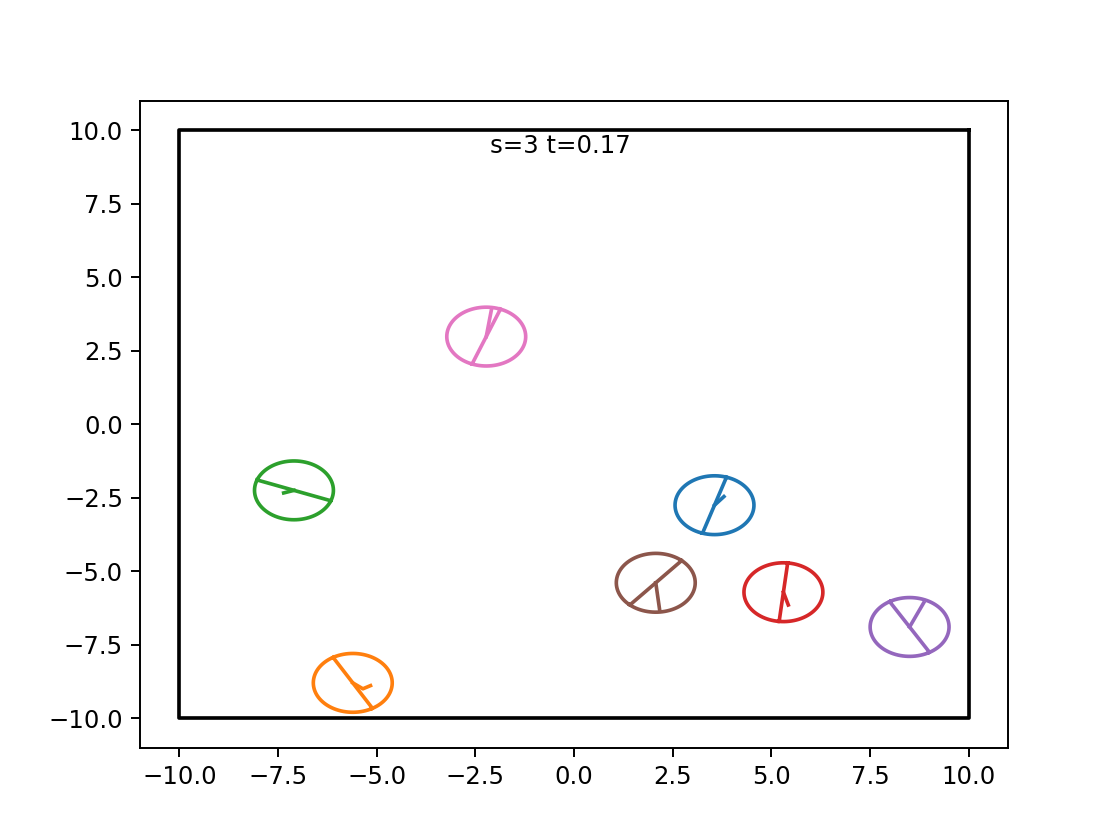

In [7]:
# animate 2D box
## This uses matplotlib funcanimate.  Must have FFMEG or equivalent installed
%run -i program/analysis.py

run_time = 10
%matplotlib notebook
S, P, D, M = re_pos.shape
anim = animate_2d_box(run_time)
display(anim)
anim.save('box_2D.mp4', fps= S/run_time, extra_args=['-vcodec', 'libx264']);